In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

In [109]:
df=pd.read_csv("C:/Users/athul/Downloads/Student_Marks.csv")

In [110]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [111]:
df.info

<bound method DataFrame.info of     number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]>

In [112]:
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [113]:
df.isnull().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

In [114]:
df['Marks'].max()

55.299

In [115]:
df['Marks'].min()

5.609

In [116]:
df['Marks'].mean()

24.417689999999997

In [117]:
60*0.3

18.0

In [118]:
Pass = []

for i in df['Marks']:
    if i >= 18:
        Pass.append(1)
    else:
        Pass.append(0)
df['pass']=Pass

In [119]:
df['pass']

0     1
1     0
2     0
3     1
4     1
     ..
95    1
96    0
97    1
98    0
99    1
Name: pass, Length: 100, dtype: int64

In [120]:
df['RESULT'] = df['Marks'].apply(lambda X:1 if X>=18 else 0)

In [121]:
df.head()

,number_courses,time_study,Marks,pass,RESULT
0,3,4.508,19.202,1,1
1,4,0.096,7.734,0,0
2,4,3.133,13.811,0,0
3,6,7.909,53.018,1,1
4,8,7.811,55.299,1,1


In [122]:
df=df.drop('RESULT',axis=1)

In [123]:
df

,number_courses,time_study,Marks,pass
0,3,4.508,19.202,1
1,4,0.096,7.734,0
2,4,3.133,13.811,0
3,6,7.909,53.018,1
4,8,7.811,55.299,1
...,...,...,...,...
95,6,3.561,19.128,1
96,3,0.301,5.609,0
97,4,7.163,41.444,1
98,7,0.309,12.027,0


In [124]:
lr=LogisticRegression()

In [125]:
X=df.drop(['pass','Marks'],axis=1)

In [126]:
X

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811
...,...,...
95,6,3.561
96,3,0.301
97,4,7.163
98,7,0.309


In [127]:
Y=df['pass']

In [128]:
Y

0     1
1     0
2     0
3     1
4     1
     ..
95    1
96    0
97    1
98    0
99    1
Name: pass, Length: 100, dtype: int64

In [129]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

In [130]:
X_train

,number_courses,time_study
8,4,4.410
33,6,6.594
45,3,2.061
19,8,3.977
14,3,2.908
...,...,...
58,3,6.198
21,6,6.126
49,5,3.913
64,7,0.130


In [131]:
X_test

,number_courses,time_study
20,4,4.733
2,4,3.133
15,4,4.260
22,5,2.051
57,7,7.649
91,8,2.730
69,6,3.948
55,7,2.913
11,7,0.423
79,3,0.805


In [132]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [133]:
Y_pred=lr.predict(X_test)

In [134]:
Y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [135]:
accuracy_score(Y_test,Y_pred)

0.9

In [136]:
Y=df['Marks']

In [137]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=43)

In [138]:
le=LinearRegression()

In [139]:
le.fit(X_train,Y_train)

LinearRegression()

In [140]:
Y_pred=le.predict(X_test)

In [141]:
Y_pred

array([25.87079557, 17.13160881, 23.28727348, 13.04484966, 47.26731115,
       22.22288974, 25.22936386, 21.39931832,  7.79895892,  2.59297617,
       31.91294776, 41.17172838, 41.18146302, 22.81873153, 40.31419568,
       21.54062547, 21.20387596,  0.54353993, 23.11557306, 19.30429218])

In [142]:
Y_test

20    22.073
2     13.811
15    19.466
22    12.209
57    51.583
91    19.564
69    21.400
55    18.238
11    12.132
79     6.349
9     30.862
38    41.358
85    39.957
0     19.202
89    40.024
13    17.672
5     17.822
1      7.734
95    19.128
83    16.106
Name: Marks, dtype: float64

In [143]:
mse=mean_squared_error(Y_test,Y_pred)

In [144]:
mse

12.20127950836759

In [145]:
r2s=r2_score(Y_test,Y_pred)

In [146]:
r2s

0.9127280674713932

In [148]:
# Variation
(np.sqrt(mse)/Y_test.mean())*100

15.639629253408286

In [149]:
s,i=np.polyfit(df['time_study'],df['Marks'],1)

In [150]:
s

5.688750421250445

In [151]:
i

1.2238581075029709

In [152]:
line=s*np.array(df['time_study'])+i

In [153]:
line

array([26.86874501,  1.76997815, 19.04671318, 46.21618519, 45.65868765,
       19.49043571, 35.71475191, 20.6395633 , 26.31124747, 36.34051446,
       43.05323995,  3.63019954, 25.21900738, 25.53757741, 17.76674433,
       25.4579349 , 33.75782177, 35.81146067, 45.08981261, 23.84801853,
       28.14871385, 36.07314319, 12.89148522, 28.95651641, 21.90246589,
        9.22792995,  4.11374332, 26.12920745,  2.11130317,  8.6135449 ,
       23.20518974, 12.16332517,  6.5257735 , 38.73547839, 24.45102608,
       44.13410253, 18.09669186, 42.65502743, 38.38846461, 45.45389263,
        2.02028317, 16.89067677, 21.65216087, 10.08124251, 12.33967643,
       12.94837273, 22.82404346, 28.41039637, 33.27996673, 23.48393851,
       39.35555218, 24.71839735,  5.60988468, 35.63510941, 44.40716256,
       17.79518808, 44.69160008, 44.73711008, 36.48273322, 43.70744625,
        3.36282827, 15.09303163, 21.73749213, 28.92238391,  1.96339566,
       13.40916151, 32.35838916,  4.35267084,  9.15966495, 23.68

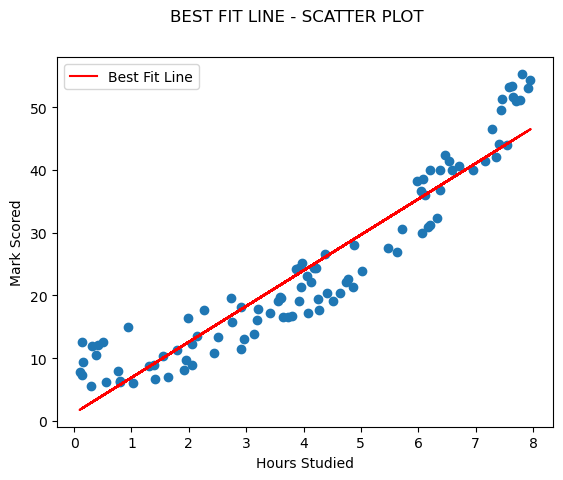

In [157]:
a=df['time_study']
b=df['Marks']
plt.scatter(a,b)
plt.suptitle("BEST FIT LINE - SCATTER PLOT")
plt.xlabel('Hours Studied')
plt.ylabel('Mark Scored')
plt.plot(a,line,color='red',label='Best Fit Line')
plt.legend()
plt.show()